<a href="https://colab.research.google.com/github/tanishajn12/NNDL-Labs/blob/main/NNDL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1)  # (60000, 784)
x_test = x_test.reshape(x_test.shape[0], -1)     # (10000, 784)

In [8]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [10]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(x_train, y_train)

Perceptron(random_state=42)

In [12]:
y_pred = perceptron.predict(x_test)

In [13]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8633


In [15]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       980
           1       0.97      0.96      0.97      1135
           2       0.83      0.92      0.87      1032
           3       0.97      0.59      0.73      1010
           4       0.72      0.97      0.83       982
           5       0.72      0.89      0.79       892
           6       0.96      0.91      0.93       958
           7       0.95      0.85      0.89      1028
           8       0.81      0.87      0.83       974
           9       0.87      0.72      0.79      1009

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000



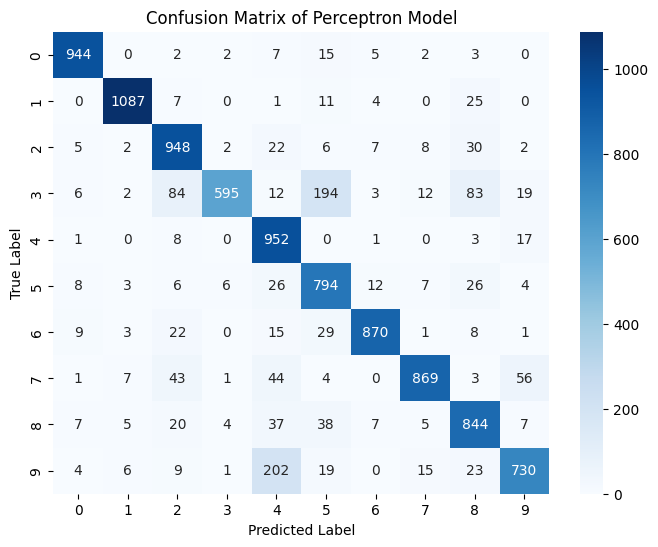

In [16]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Perceptron Model")
plt.show()

In [17]:
pca = PCA(n_components=2)  # Reduce 784 features to 2D for visualization
x_test_pca = pca.fit_transform(x_test)

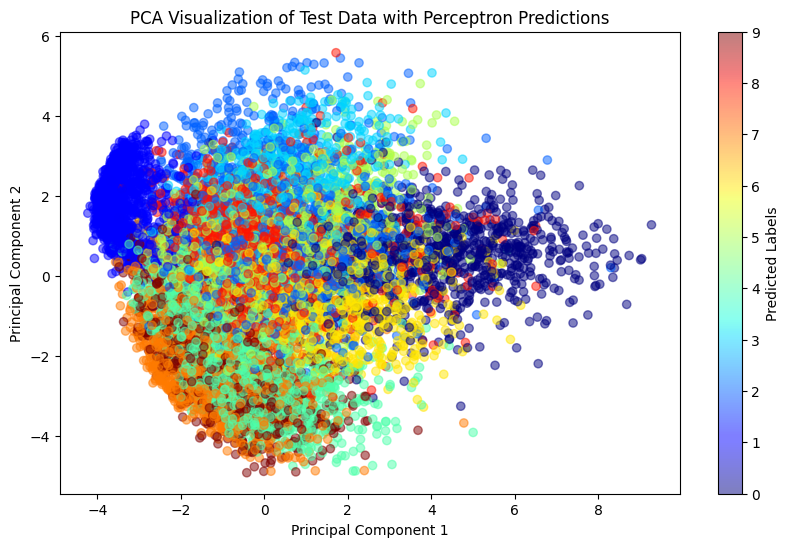

In [18]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred, cmap="jet", alpha=0.5)
plt.colorbar(scatter, label="Predicted Labels")
plt.title("PCA Visualization of Test Data with Perceptron Predictions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

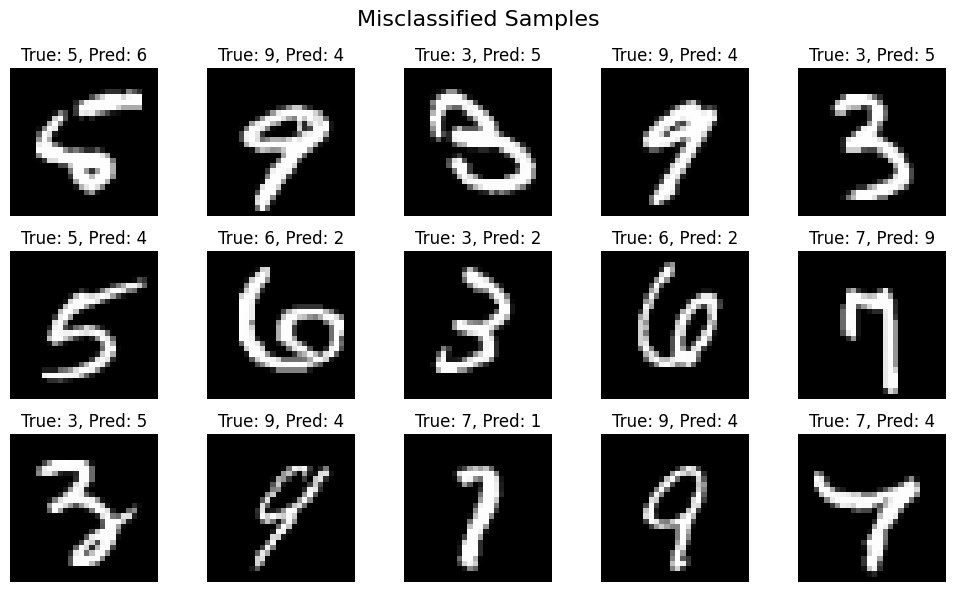

In [19]:
misclassified_idx = np.where(y_pred != y_test)[0]

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
fig.suptitle("Misclassified Samples", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < len(misclassified_idx):
        idx = misclassified_idx[i]
        ax.imshow(x_test[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
        ax.axis("off")

plt.tight_layout()
plt.show()

In [20]:
misclassified_idx = np.where(y_pred != y_test)[0]

misclassified_counts = np.bincount(y_test[misclassified_idx], minlength=10)
print("Misclassification Count per Digit:", misclassified_counts)

🔹 Misclassification Count per Digit: [ 36  48  84 415  30  98  88 159 130 279]


In [21]:
# Generate classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))


Classification Report:

              precision    recall  f1-score   support

           0     0.9584    0.9633    0.9608       980
           1     0.9749    0.9577    0.9662      1135
           2     0.8251    0.9186    0.8693      1032
           3     0.9738    0.5891    0.7341      1010
           4     0.7223    0.9695    0.8278       982
           5     0.7153    0.8901    0.7932       892
           6     0.9571    0.9081    0.9320       958
           7     0.9456    0.8453    0.8927      1028
           8     0.8053    0.8665    0.8348       974
           9     0.8732    0.7235    0.7913      1009

    accuracy                         0.8633     10000
   macro avg     0.8751    0.8632    0.8602     10000
weighted avg     0.8783    0.8633    0.8619     10000



In [23]:
# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train[:5000])  # Use 5000 samples for efficiency
y_train_sample = y_train[:5000]  # Keep labels

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


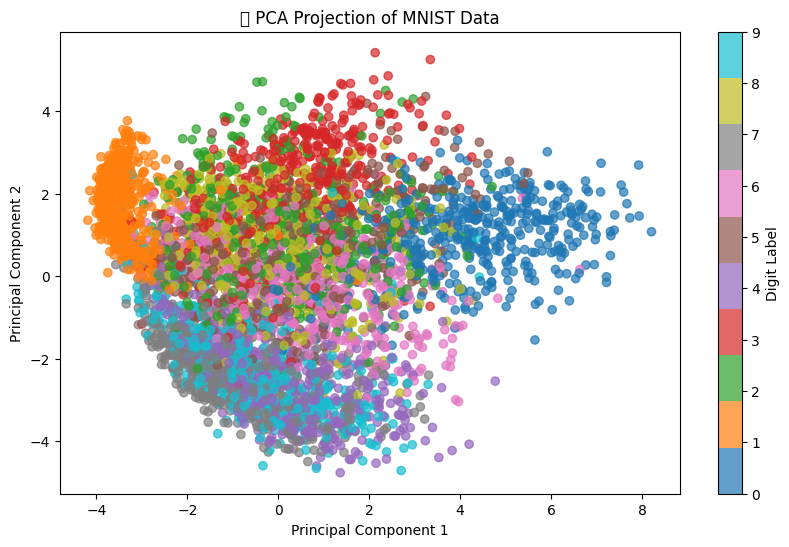

In [24]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train_sample, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("📊 PCA Projection of MNIST Data")
plt.show()
